<h1>La Regresión Lineal Simple </h1>

La regresión lineal es un algoritmo de aprendizaje supervisado que se utiliza para establecer la relación entre una variable objetivo y una o más variables independientes mediante una línea de mejor ajuste. Se basa en el principio de mínimos cuadrados ordinarios (OLS o Error Cuadrático Medio, MSE) para estimar los parámetros desconocidos de una función de regresión lineal. El objetivo principal es minimizar la diferencia cuadrada entre las variables dependientes observadas en los datos y las predichas por la función de regresión lineal.

<h2>Los datos</h2>

Vamos a desarrollar un modelo de regresión utilizando un conjunto de datos de los datos de ventas regionales en Estados Unidos a través de diferentes canales de venta, que incluyen ventas en tiendas, en línea, a través de distribuidores y al por mayor. Con un total de 17,992 filas y 15 columnas, este conjunto de datos abarca una amplia gama de información, desde detalles de pedidos y productos hasta métricas de rendimiento de ventas. Este conjunto de datos permite un análisis profundo de los patrones de ventas, las tendencias y las posibles oportunidades.

<h2>Código en Python</h2>

Para trabajar en Python debemos importar las librerias que vamos a utilizar para cargar los datos y poder analizarlos.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Luego cargamos el conjunto de datos y vemos las primeras filas y columnas del conjunto de datos. Los datos esta disponible en <a href='https://www.kaggle.com/datasets/talhabu/us-regional-sales-data'>Kaggle</a> o se puedes descargar directamente desde el repositorio en <a href='https://raw.githubusercontent.com/victormlgh/ModelajePredictivoOptimizacion/master/Semana2/US_Regional_Sales_Data.csv'>Github</a>, como hacemos en el codigo.

In [2]:
data_url = 'US_Regional_Sales_Data.csv'
df = pd.read_csv(data_url)
print(df.shape)
df.head()

(7991, 16)


,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"


Podemos observar que el conjunto de datos tiene 16 columnas y 7991 observaciones. De la cantidad de columnas, podemos descartar las columna 'OrderNumber','ProcuredDate','OrderDate','ShipDate' y 'DeliveryDate', son información irrelevante para el modelo de regresión. Eliminamos esa columnas y nos qudamos con 11.

La columna de 'Unit Price' la utlizamos como la variable dependiente y el resto como las variables independientes

In [3]:
#Eliminamos la columna de id
df = df.drop(['OrderNumber','ProcuredDate','OrderDate','ShipDate','DeliveryDate'], axis=1)

#convertimos las columnas en variables flotantes y eliminamos las comas
df['Unit Cost'] = df['Unit Cost'].str.replace(',','').astype(float)
df['Unit Price'] = df['Unit Price'].str.replace(',','').astype(float)
df['Sales Channel'] = df['Sales Channel'].astype('category').cat.codes
df['WarehouseCode'] = df['WarehouseCode'].astype('category').cat.codes
df['CurrencyCode'] = df['CurrencyCode'].astype('category').cat.codes
df.head()




,Sales Channel,WarehouseCode,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,1,4,0,6,15,259,12,5,0.075,1001.18,1963.1
1,2,2,0,14,20,196,27,3,0.075,3348.66,3939.6
2,0,4,0,21,16,213,16,1,0.050,781.22,1775.5
3,3,2,0,28,48,107,23,8,0.075,1464.69,2324.9
4,0,2,0,22,49,111,26,8,0.100,1476.14,1822.4


Primero exploramos un resumen útil de las principales estadísticas del conjunto de datos para obtener una visión general rápida de la distribución de los datos y para identificar valores atípicos (outliers) potenciales.

In [4]:
df.describe()

,Sales Channel,WarehouseCode,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
count,7991.000000,7991.000000,7991.0,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,1.354899,2.655988,0.0,14.384307,25.457014,183.850081,23.771743,4.525341,0.114394,1431.911513,2284.536504
std,0.892572,1.508811,0.0,7.986086,14.414883,105.903946,13.526545,2.312631,0.085570,1112.413063,1673.096364
min,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000,68.680000,167.500000
25%,1.000000,2.000000,0.0,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000,606.120000,1031.800000
50%,1.000000,2.000000,0.0,14.000000,25.000000,183.000000,24.000000,5.000000,0.075000,1080.580000,1849.200000
75%,2.000000,4.000000,0.0,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000,2040.250000,3611.300000
max,3.000000,5.000000,0.0,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000,5498.560000,6566.000000


Para nuestro propósito de visualización, ajustaremos la línea usando la biblioteca seaborn solo para Unit Price como variable independiente
y Unit Cost como variable dependiente. En la grafica podemos visualizar la linealidad que existe entre las variables

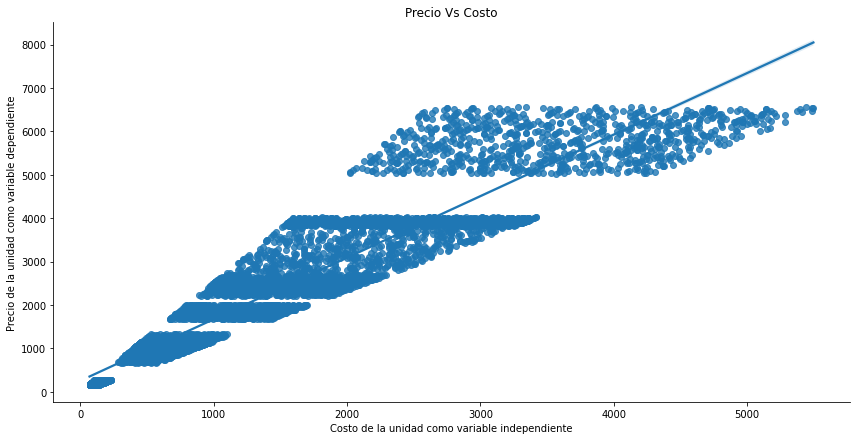

In [5]:
sns.lmplot(x='Unit Cost',y='Unit Price',data=df,aspect=2,height=6)
plt.xlabel('Costo de la unidad como variable independiente')
plt.ylabel('Precio de la unidad como variable dependiente')
plt.title('Precio Vs Costo');

Podemos visualizar la correlación entre las variables como una tabla, o como un mapa de calor para rapidamente determinar las correlaciones

                  Sales Channel  WarehouseCode  CurrencyCode  _SalesTeamID  \
Sales Channel          1.000000       0.013068           NaN      0.260862   
WarehouseCode          0.013068       1.000000           NaN      0.018161   
CurrencyCode                NaN            NaN           NaN           NaN   
_SalesTeamID           0.260862       0.018161           NaN      1.000000   
_CustomerID            0.005096      -0.004918           NaN     -0.006335   
_StoreID              -0.017248      -0.383358           NaN     -0.014791   
_ProductID            -0.011824       0.008901           NaN      0.001269   
Order Quantity        -0.001447       0.011412           NaN      0.009241   
Discount Applied       0.007952       0.017638           NaN     -0.004332   
Unit Cost             -0.007525       0.010342           NaN      0.004416   
Unit Price            -0.007707       0.004571           NaN      0.007223   

                  _CustomerID  _StoreID  _ProductID  Order Quan

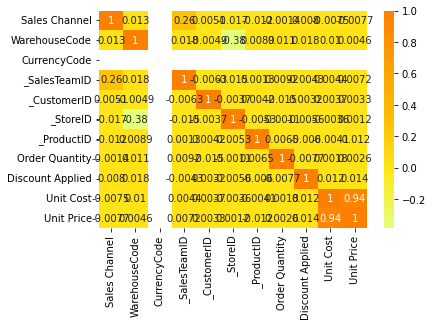

In [6]:
corr = df.corr()
print(corr)
sns.heatmap(corr, cmap = 'Wistia', annot= True);

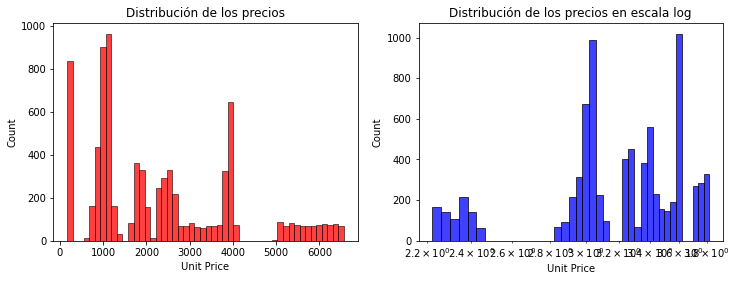

In [7]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(df['Unit Price'],bins=50,color='r',ax=ax)
ax.set_title('Distribución de los precios')

ax=f.add_subplot(122)
sns.histplot(np.log10(df['Unit Price']),bins=40,color='b',ax=ax)
ax.set_title('Distribución de los precios en escala log')
ax.set_xscale('log')

Si miramos el gráfico de la izquierda, el gráfico está sesgado a la derecha. En el gráfico de la derecha aplicaremos el logaritmo natural, luego el gráfico tiende aproximarse a una distribución normal.

Text(0.5, 1.0, 'Gráfico de violín de precio vs descuento')

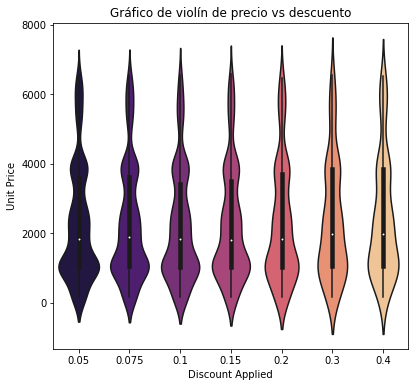

In [8]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='Discount Applied', y='Unit Price',data=df,palette='magma',ax=ax)
ax.set_title('Gráfico de violín de precio vs descuento')



En la grafica de violin podemos apreciar la fluctuación de los precios segregados por el descuento aplicado, donde el violin tiene el cuerpo representa donde se encuentran la mayoria de los precios para los productos con un descuento en especifico.

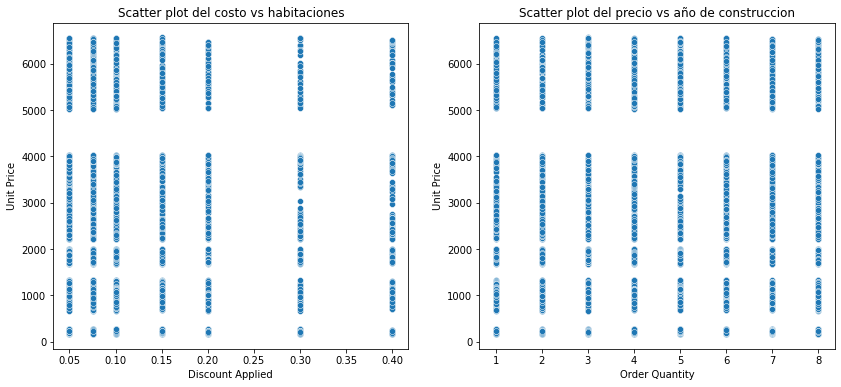

In [9]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='Discount Applied',y='Unit Price',data=df,ax=ax)
ax.set_title('Scatter plot del costo vs habitaciones')

ax = f.add_subplot(122)
sns.scatterplot(x='Order Quantity',y='Unit Price',data=df)
ax.set_title('Scatter plot del precio vs año de construccion')
plt.savefig('sc.png');



<h2>Entrenamiento del Modelo de regresión lineal simple </h2>

Iniciamos con el entrenamiento de un modelo de regresión lineal utilizando la libreria sklearn. El primer paso es separar los datos en dos partes. Los datos de entrenamiento y los datos de pruebas. Para esto utilizamos train_test_split de la libreria sklearn.model_selection.

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('Unit Price',axis=1) # Independet variable
y = df['Unit Price'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=23)

In [11]:
print(y_train.shape, X_train.shape)
print(y_test.shape, X_test.shape)

(5993,) (5993, 10)
(1998,) (1998, 10)


Los datos originales los separamos de forma aleatoria, donde el 75% de los datos los vamos a utilizar para entrenar el modelo y el resto para probar la eficiencia del modelo. Podmeos observar que para el entrenamiento tenemos 5,993 observaciones y 1,998 observaciones para las pruebas.

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train['Unit Cost'].array.reshape(-1, 1),  y_train)
print(lin_reg.intercept_, lin_reg.coef_)


260.6840419499158 [1.41275138]


Podemos apreciar los valores de la intercepción y del coeficiente. Para medir  el rendimineto del modelo vamos a predecir el precio utilizando los datos de prueba.

In [13]:
y_pred_sk = lin_reg.predict(X_test['Unit Cost'].array.reshape(-1, 1))

from sklearn.metrics import mean_squared_error

J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test['Unit Cost'].array.reshape(-1, 1),y_test)

print('El valor de MSE es: ',J_mse_sk)
print('El R^2 obtenido por scikit learn es :',R_square_sk)

El valor de MSE es:  312220.4674927496
El R^2 obtenido por scikit learn es : 0.8900967202380548


Utilizando el valor de R^2 podemos apreciar que el modelo explica el 89.00% de las variaciones solo utilizando 'Unit Cost' como variable independiente.

Text(0.5, 1.0, 'Verificar normalidad en los residuos')

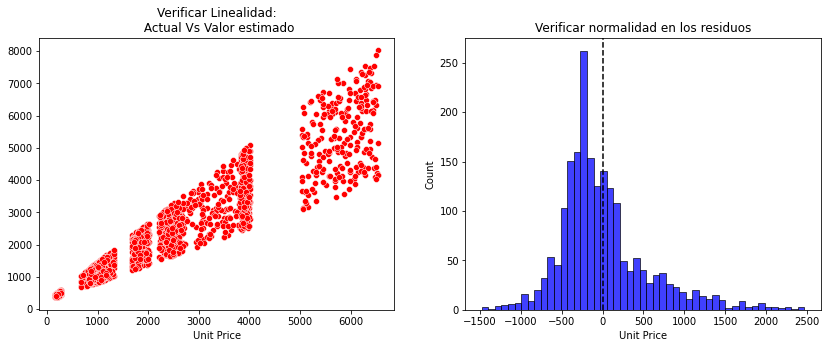

In [14]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred_sk,ax=ax,color='r')
ax.set_title('Verificar Linealidad:\n Actual Vs Valor estimado')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Verificar normalidad en los residuos')

En las graficas superiores podemos ver la linealidad de los valores estimados y los actuales y como los residuos tienen tienden a una distribución normal.

<h2>Entrenamiento del Modelo de regresión lineal multi-variable </h2>

Podemos repetir el modelo de regression considerando variables adicionales. Nos interesa comparar la mejora del modelo utilizando el resto de las variables independientes.

In [15]:
lin_reg_mult = LinearRegression()
lin_reg_mult.fit(X_test,  y_test)
print(lin_reg_mult.intercept_, lin_reg_mult.coef_)

285.5483287903446 [-1.13244387e+01 -1.92078817e+00  2.48689958e-14  1.60802901e+00
  4.00162670e-01  5.92672644e-03 -8.11960834e-01 -7.73395267e+00
 -3.83167081e+01  1.42908853e+00]


In [16]:
y_pred_ml = lin_reg_mult.predict(X_test)

J_mse_sk = mean_squared_error(y_pred_ml, y_test)

# R_square
R_square_ml = lin_reg_mult.score(X_test,y_test)

print('El valor de MSE es: ',J_mse_sk)
print('El R^2 obtenido por scikit learn es :',R_square_ml)

El valor de MSE es:  311134.70397977513
El R^2 obtenido por scikit learn es : 0.8904789148202357


Utilizando el valor de R^2 podemos apreciar que el modelo explica el 89.04% de las variaciones, para un incremento solo del 0.04%. Aunque es una mejora no es significativa con respecto al modelo anterior. ¿Qué acciones podemos tomar para mejorar el modelo de predicción?